## 1. 5 plaintexts

## Stage 1: defining functions to be used 
#### 1. encrypt : this fucntion will take plaintext and return ciphertext
#### 2. getList : this function will return outputs from 16 round of DES
#### 3. xorN
#### 4. hd : returns hamming distances by calculating XOR bits

In [36]:
def hd(str1, str2):
    str1=hex2bin(str1)
    str2=hex2bin(str2)
    distance = 0
    for ch1, ch2 in zip(str1, str2):
        if ch1 != ch2:
            distance += 1
    return distance

In [15]:
import random
def xorN(s,n):
    s=hex2bin(s)
    indices=random.choices(list(range(64)),k=n)
    ls=list(s)
    #print(ls)
    #print()
    #print(indices)
    for i in indices:
        if ls[i]=='0':
            ls[i]='1'
        else:
            ls[i]='0'
    ans= "".join(ls)
    return bin2hex(ans)
        

In [1]:
def hex2bin(s):
    mp = {'0': "0000",
        '1': "0001",
        '2': "0010",
        '3': "0011",
        '4': "0100",
        '5': "0101",
        '6': "0110",
        '7': "0111",
        '8': "1000",
        '9': "1001",
        'A': "1010",
        'B': "1011",
        'C': "1100",
        'D': "1101",
        'E': "1110",
        'F': "1111"}
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin
def bin2hex(s):
    mp = {"0000": '0',
        "0001": '1',
        "0010": '2',
        "0011": '3',
        "0100": '4',
        "0101": '5',
        "0110": '6',
        "0111": '7',
        "1000": '8',
        "1001": '9',
        "1010": 'A',
        "1011": 'B',
        "1100": 'C',
        "1101": 'D',
        "1110": 'E',
        "1111": 'F'}
    hex = ""
    for i in range(0, len(s), 4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]

    return hex

# Binary to decimal conversion


def bin2dec(binary):

    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

# Decimal to binary conversion


def dec2bin(num):
    res = bin(num).replace("0b", "")
    if(len(res) % 4 != 0):
        div = len(res) / 4
        div = int(div)
        counter = (4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res

# Permute function to rearrange the bits


def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation

# shifting the bits towards left by nth shifts


def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1, len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
    return k

# calculating xow of two strings of binary number a and b


def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans


# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
        6, 7, 8, 9, 8, 9, 10, 11,
        12, 13, 12, 13, 14, 15, 16, 17,
        16, 17, 18, 19, 20, 21, 20, 21,
        22, 23, 24, 25, 24, 25, 26, 27,
        28, 29, 28, 29, 30, 31, 32, 1]

# Straight Permutation Table
per = [16, 7, 20, 21,
    29, 12, 28, 17,
    1, 15, 23, 26,
    5, 18, 31, 10,
    2, 8, 24, 14,
    32, 27, 3, 9,
    19, 13, 30, 6,
    22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
        [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
        [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

        [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

        [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
        [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
        [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
        [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

        [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

        [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
        [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
        [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

        [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

        [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
        [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
        [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
        [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
            39, 7, 47, 15, 55, 23, 63, 31,
            38, 6, 46, 14, 54, 22, 62, 30,
            37, 5, 45, 13, 53, 21, 61, 29,
            36, 4, 44, 12, 52, 20, 60, 28,
            35, 3, 43, 11, 51, 19, 59, 27,
            34, 2, 42, 10, 50, 18, 58, 26,
            33, 1, 41, 9, 49, 17, 57, 25]

In [5]:
def encrypt(pt, rkb, rk,myList):
    pt = hex2bin(pt)

    # Initial Permutation
    pt = permute(pt, initial_perm, 64)
   # print("After initial permutation", bin2hex(pt))

    # Splitting
    left = pt[0:32]
    right = pt[32:64]
    for i in range(0, 16):
        # Expansion D-box: Expanding the 32 bits data into 48 bits
        right_expanded = permute(right, exp_d, 48)

        # XOR RoundKey[i] and right_expanded
        xor_x = xor(right_expanded, rkb[i])

        # S-boxex: substituting the value from s-box table by calculating row and column
        sbox_str = ""
        for j in range(0, 8):
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(
                int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)

        # Straight D-box: After substituting rearranging the bits
        sbox_str = permute(sbox_str, per, 32)

        # XOR left and sbox_str
        result = xor(left, sbox_str)
        left = result
        
        # Swapper
        val1=bin2hex(left)
        val2=bin2hex(right)
        myList.append(val1+val2)
        if(i != 15):
            left, right = right, left

    # Combination
    combine = left + right

    # Final permutation: final rearranging of bits to get cipher text
    cipher_text = permute(combine, final_perm, 64)
    return cipher_text

In [6]:
def getList(pt,key):
    myList=[]
    # Key generation
    # --hex to binary
    key = hex2bin(key)

    # --parity bit drop table
    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4]

    # getting 56 bit key from 64 bit using the parity bits
    key = permute(key, keyp, 56)

    # Number of bit shifts
    shift_table = [1, 1, 2, 2,
                2, 2, 2, 2,
                1, 2, 2, 2,
                2, 2, 2, 1]

    # Key- Compression Table : Compression of key from 56 bits to 48 bits
    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32]

    # Splitting
    left = key[0:28] # rkb for RoundKeys in binary
    right = key[28:56] # rk for RoundKeys in hexadecimal

    rkb = []
    rk = []
    for i in range(0, 16):
        # Shifting the bits by nth shifts by checking from shift table
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])

        # Combination of left and right string
        combine_str = left + right

        # Compression of key from 56 to 48 bits
        round_key = permute(combine_str, key_comp, 48)

        rkb.append(round_key)
        rk.append(bin2hex(round_key))

    #print("Encryption")
    cipher_text = bin2hex(encrypt(pt, rkb, rk,myList))
    print("Cipher Text : ", cipher_text)
    
    return myList

### 2nd stage : generate data by changing plaintexts

In [25]:
pt = "123456ABCD132536"
key = "AABB09182736CCDD"

In [26]:
xorPtList=[]
for _ in range(5):
    xorPtList.append(xorN(pt,1))


#### Generate 5 plaintexts by XORring 1 bit in our 64 bit plaintext

In [28]:
xorPtList

['123456ABCD1B2536',
 '123056ABCD132536',
 '123457ABCD132536',
 '1234D6ABCD132536',
 '123456ABCD332536']

In [30]:
cList=getList(pt,key) 

Cipher Text :  C0B7A8D05F3A829C


#### List of 16 rounds' output of original plaintext

In [32]:
cList

['5A78E39418CA18AD',
 '4A1210F65A78E394',
 'B80895914A1210F6',
 '236779C2B8089591',
 'A15A4B87236779C2',
 '2E8F9C65A15A4B87',
 'A9FC20A32E8F9C65',
 '308BEE97A9FC20A3',
 '10AF9D37308BEE97',
 '6CA6CB2010AF9D37',
 'FF3C485F6CA6CB20',
 '22A5963BFF3C485F',
 '387CCDAA22A5963B',
 'BD2DD2AB387CCDAA',
 'CF26B472BD2DD2AB',
 '19BA9212CF26B472']

#### List of list of 16 rounds' output of our 5 new plaintexts

In [33]:
x1cL=[]
for i in range(5):
    x1cL.append(getList(xorPtList[i],key))

Cipher Text :  71BA22BAD4AC8F6D
Cipher Text :  8B0F8232109499C3
Cipher Text :  4E9A90BE613153EB
Cipher Text :  B62F4C38AAC7F2BF
Cipher Text :  820439138FED7E4F


In [35]:
for i in x1cL:
    print(i)
    print()

['7B7CE31418CA38AD', '8CBB96A67B7CE314', 'C516FDAF8CBB96A6', '7B26AE43C516FDAF', '66299AD17B26AE43', '4953F32766299AD1', 'F23C81D34953F327', '239D9DDCF23C81D3', '89CAF49A239D9DDC', 'BC32822589CAF49A', '19ACF7C3BC328225', '2066587C19ACF7C3', '989EBEBD2066587C', '0B944EB1989EBEBD', '7AAFEA4E0B944EB1', '911BF0C17AAFEA4E']

['5A78E19418CA18AD', '5A3210FE5A78E194', 'F68A52925A3210FE', '1CBBA10CF68A5292', '54646F551CBBA10C', 'E665E48F54646F55', 'E66ACFDDE665E48F', '6F3B05FDE66ACFDD', '7ACA85FA6F3B05FD', '9D3D5CA37ACA85FA', '24581D399D3D5CA3', '6B0CB33624581D39', '4FB468926B0CB336', 'F5CE00624FB46892', 'E508438FF5CE0062', '807822C3E508438F']

['5A78E39018CA18AD', '4A1018F65A78E390', '1908B55D4A1018F6', '4DDDFC7E1908B55D', '51785EF94DDDFC7E', '667B884151785EF9', '63E3D8F3667B8841', '35ED065763E3D8F3', 'FF9164B235ED0657', 'B0753747FF9164B2', '92D53185B0753747', 'FC4EFA3392D53185', 'EA075977FC4EFA33', '66ACD268EA075977', '8EB88BCB66ACD268', 'D16E09F08EB88BCB']

['1A70E3841CCA18AD', '48430AD11A70

#### calculating hamming distances and generating data for plotting

In [44]:
finalList=[] 
# It will contain list of 16 rounds' HD of XORed plaintexts with that of original plaintexts

In [45]:
for i in range(5):
    tempL=[]
    for s1,s2 in zip(cList,x1cL[i]):
        tempL.append(hd(s1,s2))
    print(tempL)
    finalList.append(tempL)
        

[5, 17, 31, 31, 31, 36, 31, 28, 32, 28, 29, 32, 29, 32, 34, 30]
[1, 4, 16, 33, 37, 34, 39, 41, 34, 33, 35, 30, 29, 31, 36, 35]
[1, 3, 10, 26, 33, 26, 27, 28, 33, 42, 41, 37, 36, 31, 30, 34]
[4, 14, 29, 37, 40, 39, 35, 32, 34, 37, 35, 37, 32, 33, 38, 35]
[5, 19, 35, 36, 32, 30, 32, 34, 37, 37, 31, 33, 30, 28, 31, 34]


In [51]:
from itertools import zip_longest
tranposed_tuples = zip_longest(*finalList, fillvalue=None)
transposed_tuples_list = list(tranposed_tuples)
data = [list(sublist) for sublist in transposed_tuples_list]

In [52]:
data

[[5, 1, 1, 4, 5],
 [17, 4, 3, 14, 19],
 [31, 16, 10, 29, 35],
 [31, 33, 26, 37, 36],
 [31, 37, 33, 40, 32],
 [36, 34, 26, 39, 30],
 [31, 39, 27, 35, 32],
 [28, 41, 28, 32, 34],
 [32, 34, 33, 34, 37],
 [28, 33, 42, 37, 37],
 [29, 35, 41, 35, 31],
 [32, 30, 37, 37, 33],
 [29, 29, 36, 32, 30],
 [32, 31, 31, 33, 28],
 [34, 36, 30, 38, 31],
 [30, 35, 34, 35, 34]]

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

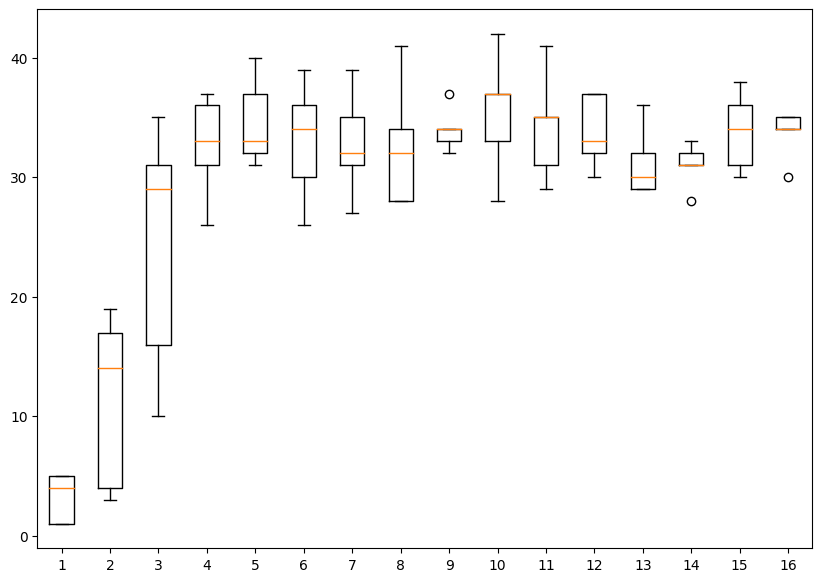

In [56]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = [250, 200]
# Creating axes instance
bp = ax.boxplot(data)
plt.show()